In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import numpy as np 
import qiskit as q
qr = q.QuantumRegister(4)
circ2 = q.QuantumCircuit(qr)

### encode the state 110 at first
circ2.x(qr[0])
circ2.x(qr[1])
circ2.x(qr[2]) 
circ2.x(qr[3])

### repeat what's done before

### add the first H gate (in qiskit east significant bit has the lowest index) 
circ2.h(qr[2])
### add the controlled phase gate 
circ2.cp(np.pi/2, qr[1], qr[2]) # based on qubit 1 apply 2pi/2**(k-1) rotation to qubit 2


### add the next cp gate
circ2.cp(np.pi/4, qr[0], qr[2]) # based on qubit 0 apply 2pi/2**(k-1) rotation to qubit 2


### repeat the process for qubit 1
circ2.h(qr[1])
circ2.cp(np.pi/2, qr[0], qr[1])



### add the final h gate
circ2.h(qr[0])

circ2.ry(np.pi / 4, qr[2])
circ2.ry(-np.pi /2 , qr[3])
circ2.rz(-np.pi/4, qr[3])


### finally swap the bits 0 th, and 2nd qubit 
circ2.swap(qr[0], qr[2])
circ2.swap(qr[1],qr[2])
circ2.swap(qr[1],qr[3])

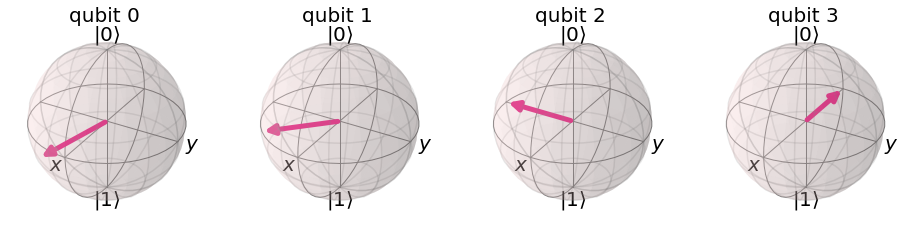

In [3]:
circ2.save_statevector()

qasm_sim = q.Aer.get_backend('qasm_simulator')


statevector = qasm_sim.run(circ2).result().get_statevector()
q.visualization.plot_bloch_multivector(statevector)

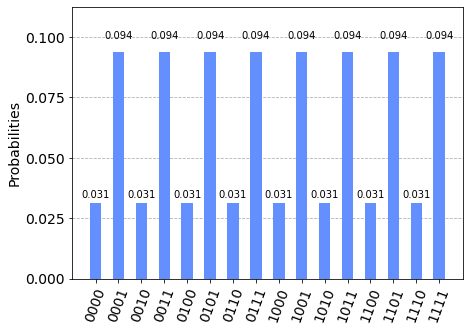

In [129]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circ2, backend=simulator, shots=1000).result().get_counts(circ2)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
import numpy as np 
import qiskit as q

qr = q.QuantumRegister(4)
circ = q.QuantumCircuit(qr)
### add the first H gate (in qiskit least significant bit has the lowest index) 
circ.h(qr[3])
### add the controlled phase gate 
circ.cp(np.pi/2, qr[1], qr[2]) # based on qubit 1 apply 2pi/2**(k-1) rotation to qubit 2
### add the next cp gate
circ.cp(np.pi/4, qr[0], qr[2]) # based on qubit 0 apply 2pi/2**(k-1) rotation to qubit 2

### repeat the process for qubit 1
circ.h(qr[1])
circ.cp(np.pi/2, qr[0], qr[1])

### add the final h gate


### finally swap the bits 0 th, and 2nd qubit 

circ.swap(qr[0], qr[2])